In [3]:
import pandas as pd
import pytz
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.load_local_data import load_data

In [5]:
path = os.getcwd()
print("Current Directory", path)
 

parent_directory = os.path.dirname(path)
print("Parent Directory", parent_directory)

data_directory = parent_directory + '\data'
print("Data Directory", data_directory)

Current Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\notebooks
Parent Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP
Data Directory c:\Users\elmha\OneDrive - Universidad de Chile\GitHub\Sistema_Experto_APP\data


In [6]:
local_path = data_directory + '\Horcon-etiquetado_con_1_etiqueta.csv'
df = load_data(local_path)
df.head()

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2013-02-03 10:00:00-03:00,981.5,17.81,257,1
2013-02-03 11:00:00-03:00,871.1,17.86,9,1
2013-02-03 12:00:00-03:00,870.7,17.80,9,1
2013-02-03 13:00:00-03:00,1025.5,17.71,256,1
2013-02-03 14:00:00-03:00,870.3,17.84,9,1


In [59]:
time_window = df.loc['15-08-2015':'15-01-2017']

In [67]:
time_window.sort_index(inplace=True)

<AxesSubplot:xlabel='Date_Time'>

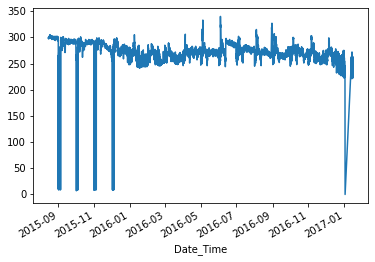

In [69]:
time_window['EC [µs/cm]'].plot()

In [40]:
import matplotlib.pyplot as plt

In [70]:
a  = time_window.loc[time_window['etiqueta conjunta'] == 1] #anomaly

In [71]:
time_window

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2015-08-15 00:00:00-03:00,1251.8,15.16,299,0
2015-08-15 01:00:00-03:00,1296.3,15.14,300,0
2015-08-15 02:00:00-03:00,1286.1,15.05,299,0
2015-08-15 03:00:00-03:00,1353.5,15.02,299,0
2015-08-15 04:00:00-03:00,1353.7,14.93,299,0
...,...,...,...,...
2017-01-15 19:00:00-03:00,1356.8,17.04,263,0
2017-01-15 20:00:00-03:00,1232.2,17.02,226,0
2017-01-15 21:00:00-03:00,1256.7,17.10,223,0


In [72]:
a

,Pression [cm H2O],Temperatura [°C],EC [µs/cm],etiqueta conjunta
Date_Time,,,,
2015-08-30 21:00:00-03:00,1380.2,14.96,296,1
2015-08-30 22:00:00-03:00,1220.1,14.85,295,1
2015-08-30 23:00:00-03:00,1135.7,14.98,296,1
2015-08-31 00:00:00-03:00,1101.2,15.14,297,1
2015-08-31 01:00:00-03:00,1314.0,15.19,300,1
...,...,...,...,...
2017-01-02 16:00:00-03:00,868.7,26.91,1,1
2017-01-02 17:00:00-03:00,912.1,26.98,1,1
2017-01-02 18:00:00-03:00,912.9,27.69,0,1


In [75]:
import plotly.graph_objects as go

figg = go.Figure()

figg.add_trace(go.Scatter(x=time_window.index, y=time_window['Pression [cm H2O]'],
                    mode='lines',
                    name='operación normal',
                    line_color='cadetblue'))
figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg.add_trace(go.Scatter(x=a.index, y=a['Pression [cm H2O]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))
                                        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg.update_layout(title='Presión [cm H2O]',
                    yaxis_title='Presión [cm H2O]',
                    xaxis_title='Fecha'
)

# st.plotly_chart(figg, use_container_width=True)
figg.show()

# t = datas.loc[datas['Etiqueta T'] == 1] #anomaly

figg2 = go.Figure()

figg2.add_trace(go.Scatter(x=time_window.index, y=time_window['Temperatura [°C]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkolivegreen'))
figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg2.add_trace(go.Scatter(x=a.index, y=a['Temperatura [°C]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))        
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg2.update_layout(title='Temperatura [°C]',
                    yaxis_title='Temperatura [°C]',
                    xaxis_title='Fecha'
)

figg2.show()
# st.plotly_chart(figg2, use_container_width=True)

# e = datas.loc[datas['Etiqueta EC'] == 1] #anomaly
figg3 = go.Figure()

figg3.add_trace(go.Scatter(x=time_window.index, y=time_window['EC [µs/cm]'],
                    mode='lines',
                    name='operación normal',
                    line_color='darkgoldenrod'))
figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
                    mode='markers',
                    name='anomalía etiquetada',
                    marker_color='cyan',
                    marker_line_width=0.5,
                    opacity=0.5))
# figg3.add_trace(go.Scatter(x=a.index, y=a['EC [µs/cm]'],
#                     mode='markers',
#                     name='anomalía detectada',
#                     marker_color='red',
#                     marker_line_width=0.5,
#                     opacity=0.7))                     
# figg.update_traces(mode='markers', marker_line_width=2, marker_size=10)
figg3.update_layout(title='EC [µs/cm]',
                    yaxis_title='EC [µs/cm]',
                    xaxis_title='Fecha'
)


# st.plotly_chart(figg3, use_container_width=True)



In [55]:
time_window.index

DatetimeIndex(['2015-08-31 21:00:00-03:00', '2015-08-31 22:00:00-03:00',
               '2015-08-31 23:00:00-03:00', '2015-09-01 00:00:00-03:00',
               '2015-09-01 01:00:00-03:00', '2015-09-01 02:00:00-03:00',
               '2015-09-01 03:00:00-03:00', '2015-09-01 04:00:00-03:00',
               '2015-09-01 05:00:00-03:00', '2015-09-01 06:00:00-03:00',
               ...
               '2017-02-20 03:00:00-03:00', '2017-02-20 04:00:00-03:00',
               '2017-02-20 05:00:00-03:00', '2017-02-20 06:00:00-03:00',
               '2017-02-20 07:00:00-03:00', '2017-02-20 08:00:00-03:00',
               '2017-02-20 09:00:00-03:00', '2017-02-20 10:00:00-03:00',
               '2017-02-20 11:00:00-03:00', '2017-02-20 12:00:00-03:00'],
              dtype='datetime64[ns, Chile/Continental]', name='Date_Time', length=13333, freq=None)